# Task-1  : Prediction using Supervised ML

# Grip @ The Sparks Foundations 

# Author : Jishnu P

# Linear Regression

In this regression problem we have to Predict the percentage of an student based on the no. of study hours.
and This is a simple linear regression task as it involves just 2 variables.

# Problem Statement

Predict the percentage of an student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing all libraries required in this notebook

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')  # to supress warnings.
import os
import sys
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Step-1 : Reading and Understanding the data

In [7]:
data='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(data)
print('Data Imported Successfully')
df.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.shape

(25, 2)

we have 25 rows and 2 columns.

In [14]:
df.info()
# there is two datatypes available that is float and int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

### Step-2 : Input Data Visualization

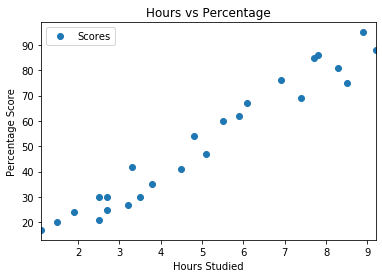

In [17]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

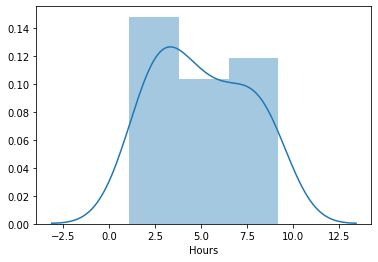

Skewness :  0.1903382010052985


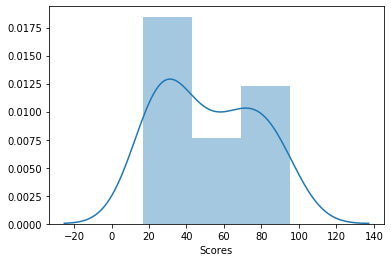

Skewness :  0.2339646665397317


In [21]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    print('Skewness : ',df[i].skew())

#### There is a small right skew that is acceptable.high magnitude of the skewness coefficient will tell you that there is high difference from normal distribution.

### Step-3 :Data Preprocessing

This step involves division of attributes and target that is input and output.

In [25]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

##### so we have done dividing the data into attributes and target.now we have to split into train and test data by using Scikit-Learn's default train-test split.

### Step 4 : Model Training

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

print('Shape of data')
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

Shape of data
x_train shape (20, 1)
x_test shape (5, 1)
y_train shape (20,)
y_test shape (5,)


In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print('Training completed')

Training completed


### Step-5 : Plotting the Line of Regression

now since our data is trained,now it's time to visualize the best fit of line of regression.

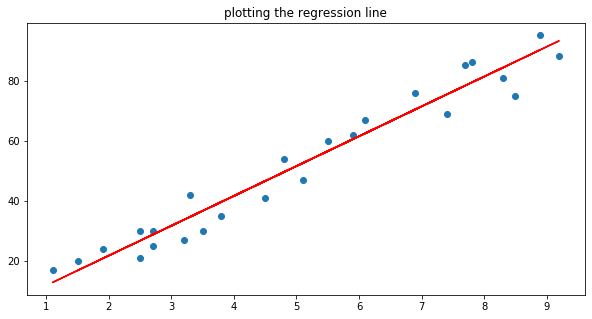

In [28]:
#plotting the regression line
line=lr.coef_*x+lr.intercept_

#plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,line,color='r')
plt.title('plotting the regression line')
plt.show()

### Step - 6 : Making Predictions

##### Now that we have trained our algorithm,it's time to test the model by making some predictions.For this we will use our test-set data

In [30]:
#testing data
print('Testing data \n ',x_test)

#model_predictions
y_pred=lr.predict(x_test)
print('\n predicted values : \n')
print(y_pred)

Testing data 
  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 predicted values : 

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Step-7 : Comparing Actual result to the predicted Model result

In [32]:
#comparing actual vs predicted

df1=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df1

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
# Estimating Training and Test score.

print('Training score',lr.score(x_train,y_train))
print('Testing score',lr.score(x_test,y_test))


Training score 0.9515510725211552
Testing score 0.9454906892105356


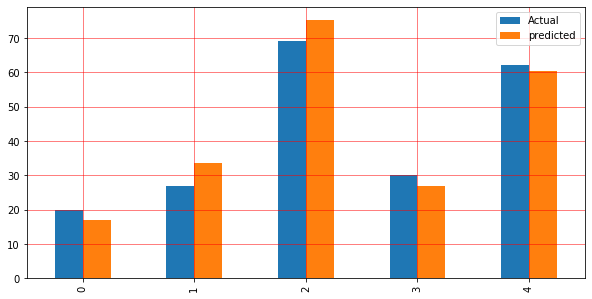

In [34]:
#plotting the Bar graph to depict the difference between the actualand predicted value.
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major',linewidth='0.5',color='r')
plt.grid(which='minor',linewidth='0.5',color='b')
plt.show()

In [35]:
#now predicting the percentage score if a student studies for 9.5 hrs/day.

In [37]:
hrs=np.array(9.25).reshape(-1,1)
hrs_pred=lr.predict(hrs)
print('No of hours the student studied :',hrs[0,0])
print('predicted score if a student studies for 9.25 hrs/day :',hrs_pred[0])

No of hours the student studied : 9.25
predicted score if a student studies for 9.25 hrs/day : 93.69173248737538


### Step-8 Evaluating Model

Model Evaluation is an integral part of the model development process.it helps to find the best model that represents our data and how well the chosen model will work in the future.for evaluating the model we can calculate R squared,RMSE and MAE.

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('R square :',r2_score(y_test,y_pred))
print('mean squared error :',mse)
print('mean absolute error :',mae)
print('RMSE :',np.sqrt(mse))

R square : 0.9454906892105356
mean squared error : 21.5987693072174
mean absolute error : 4.183859899002975
RMSE : 4.6474476121003665


#### R2 gives the score of model fit and in this case we have r2=0.9454 which is actually a grest score for this model.

#### The MAE and the RMSE can be used together to diagnose the variation in the errors in a set of forcasts.the RMSE will always be largeror equalto the MAE;the greater diffference between them ,the greaater variance in the individual errors in the sample.if the RMSE=MAE  then the all the errors are of the same magnitude,also lower the value of both MaE and RMSE is almost equal to MAE which means the errors are of some magnitude.

## Conclusion

#### I was succcessfully able to carry-out predictions using Supervised ML task and was able to evaluate the modl's performance on various parameters.

## THANK YOU